In [60]:
#Analisis exploratorio de los datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
#se cargan los datos procesados

# Nombres de los archivos
nombres_archivos = ["customer", "film", "inventory", "rental", "store"]

ruta_ = {}
df_ = {}

# Iterar sobre los nombres de los archivos
for i in nombres_archivos:
    # Asegurar que la ruta conduzca a la ubicación de los archivos
    ruta_[i] = fr"C:\Users\User\Documents\Prueba_tecnica_Ing_Datos\outputs\processed_films\{i}.csv"
    
    # Leer el archivo CSV y almacenarlo en el diccionario
    df_[i] = pd.read_csv(ruta_[i])

    print(f"Archivo '{i}.csv' cargado correctamente.")  # Mensaje opcional de verificación
    print(df_[i].head(3))

Archivo 'customer.csv' cargado correctamente.
   customer_id  store_id first_name  last_name  \
0            1         1       MARY      SMITH   
1            2         1   PATRICIA    JOHNSON   
2            3         1      LINDA   WILLIAMS   

                                  email  address_id  active  \
0         MARY.SMITH@sakilacustomer.org           5       1   
1   PATRICIA.JOHNSON@sakilacustomer.org           6       1   
2     LINDA.WILLIAMS@sakilacustomer.org           7       1   

           create_date          last_update customer_id_old       segment  
0  2006-02-14 22:04:36  2006-02-15 04:57:20        CC-12370     Corporate  
1  2006-02-14 22:04:36  2006-02-15 04:57:20        NM-18445   Home Office  
2  2006-02-14 22:04:36  2006-02-15 04:57:20        MS-17830     Corporate  
Archivo 'film.csv' cargado correctamente.
   film_id              title  \
0        1   ACADEMY DINOSAUR   
1        2     ACE GOLDFINGER   
2        3   ADAPTATION HOLES   

                     

In [74]:
for i in nombres_archivos:
    print("\n" + "="*40)
    print(f"📂 Información del DataFrame '{i}':")
    df_[i].info()  



📂 Información del DataFrame 'customer':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1392 entries, 0 to 1391
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   customer_id      1392 non-null   int64 
 1   store_id         1392 non-null   int64 
 2   first_name       1392 non-null   object
 3   last_name        1392 non-null   object
 4   email            1392 non-null   object
 5   address_id       1392 non-null   int64 
 6   active           1392 non-null   int64 
 7   create_date      1392 non-null   object
 8   last_update      1392 non-null   object
 9   customer_id_old  1392 non-null   object
 10  segment          1392 non-null   object
dtypes: int64(4), object(7)
memory usage: 119.8+ KB

📂 Información del DataFrame 'film':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            -

In [75]:
for i in nombres_archivos:
    print("\n" + "="*40)
    print(f"📐 Estadísticas del DataFrame '{i}':")
    print(df_[i].describe()) 


📐 Estadísticas del DataFrame 'customer':
       customer_id     store_id   address_id       active
count  1392.000000  1392.000000  1392.000000  1392.000000
mean    696.500000     1.480603   476.356322     0.989224
std     401.980099     0.499803   187.717263     0.103283
min       1.000000     1.000000     5.000000     0.000000
25%     348.750000     1.000000   353.750000     1.000000
50%     696.500000     1.000000   606.000000     1.000000
75%    1044.250000     2.000000   606.000000     1.000000
max    1392.000000     2.000000   606.000000     1.000000

📐 Estadísticas del DataFrame 'film':
           film_id  release_year  language_id  rental_duration  rental_rate  \
count  1003.000000        1003.0       1003.0      1003.000000  1003.000000   
mean    499.960120        2006.0          1.0         4.982054     2.986012   
std     288.555315           0.0          0.0         1.410566     1.647591   
min       1.000000        2006.0          1.0         3.000000     0.990000   
25%

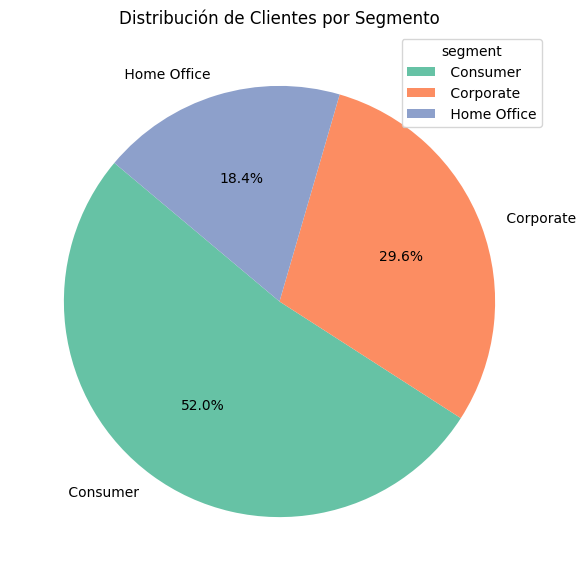

In [102]:

def grafico_pastel_clientes(df, columna, titulo="Distribución de Clientes por Segmento"):
    
    # Contar la cantidad de clientes por categoría
    conteo = df[columna].value_counts()

    # Crear el gráfico de pastel
    plt.figure(figsize=(7, 7))
    plt.pie(conteo, labels=conteo.index, autopct="%1.1f%%", startangle=140, colors=plt.cm.Set2.colors)

    # Agregar leyenda
    plt.legend(title=columna)

    # Agregar título
    plt.title(titulo)

    # Mostrar gráfico
    plt.show()

# Suponiendo que "segment" es la columna con la segmentación de clientes
grafico_pastel_clientes(df_["customer"], "segment", "Distribución de Clientes por Segmento")


In [103]:

# Unir rental con inventory usando inventory_id
rental_inventory = df_["rental"].merge(df_["inventory"], on="inventory_id", how="left")

# Unir el resultado con film usando film_id
rental_film = rental_inventory.merge(df_["film"], on="film_id", how="left")

# Seleccionar solo las columnas necesarias
df_film_rental = rental_film[["rental_id", "customer_id", "rental_date","rental_rate", "return_date", "film_id", "title", "release_year", "length", "rating", "staff_id"]]

# 4️⃣ Mostrar el nuevo DataFrame
df_film_rental.head(2)

,rental_id,customer_id,rental_date,rental_rate,return_date,film_id,title,release_year,length,rating,staff_id
0,1,130,2005-05-24 22:53:30,2.99,2005-05-26 22:04:30,80,BLANKET BEVERLY,2006,148,G,1
1,2,459,2005-05-24 22:54:33,2.99,2005-05-28 19:40:33,333,FREAKY POCUS,2006,126,R,1


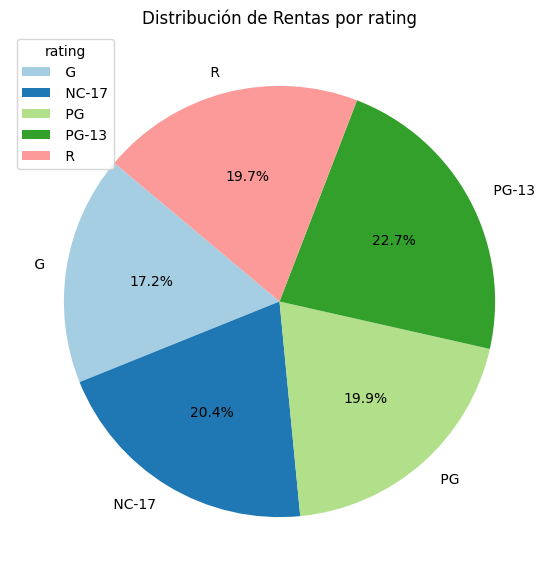

In [104]:
def grafico_pastel_rentas(df, columna):
    
    # Contar el número de rentas por categoría
    rental_counts = df.groupby(columna)["rental_id"].count()

    # Crear el gráfico de pastel
    plt.figure(figsize=(7, 7))
    plt.pie(rental_counts, labels=rental_counts.index, autopct="%1.1f%%", startangle=140, colors=plt.cm.Paired.colors)

    # Agregar título
    plt.title(f"Distribución de Rentas por {columna}")

    # Agregar leyenda
    plt.legend(title=columna)

    # Mostrar gráfico
    plt.show()

# Llamar a la función con el DataFrame y la columna "rating"
grafico_pastel_rentas(df_film_rental, "rating")

C:\Users\User\AppData\Local\Temp\ipykernel_2852\663873687.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[columna_fecha] = pd.to_datetime(df[columna_fecha])
C:\Users\User\AppData\Local\Temp\ipykernel_2852\663873687.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["rental_month"] = df[columna_fecha].dt.to_period("M").astype(str)


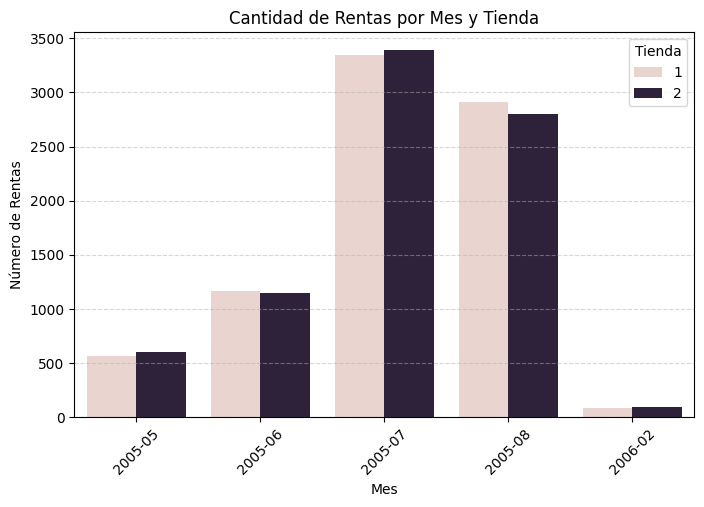

In [ ]:
def grafico_rentas_por_mes_tienda(df, columna_fecha, columna_tienda):
   
    df[columna_fecha] = pd.to_datetime(df[columna_fecha])

    # Contar la cantidad de rentas por mes y tienda
    df["rental_month"] = df[columna_fecha].dt.to_period("M").astype(str)
    rentas_por_mes_tienda = df.groupby(["rental_month", columna_tienda])["rental_id"].count().reset_index()

    # Crear el gráfico de barras con Seaborn
    plt.figure(figsize=(8, 5))
    sns.barplot(data=rentas_por_mes_tienda, x="rental_month", y="rental_id", hue=columna_tienda)

    plt.xlabel("Mes")
    plt.ylabel("Número de Rentas")
    plt.title("Cantidad de Rentas por Mes y Tienda")
    plt.xticks(rotation=45)  # Rotar los meses para mejor visibilidad
    plt.legend(title="Tienda")
    plt.grid(axis="y", linestyle="--", alpha=0.5)

    plt.show()

# Llamar a la función
grafico_rentas_por_mes_tienda(df_film_rental, "rental_date", "staff_id")

C:\Users\User\AppData\Local\Temp\ipykernel_2852\2505316719.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[columna_fecha] = pd.to_datetime(df[columna_fecha])
C:\Users\User\AppData\Local\Temp\ipykernel_2852\2505316719.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["rental_month"] = df[columna_fecha].dt.to_period("M").astype(str)


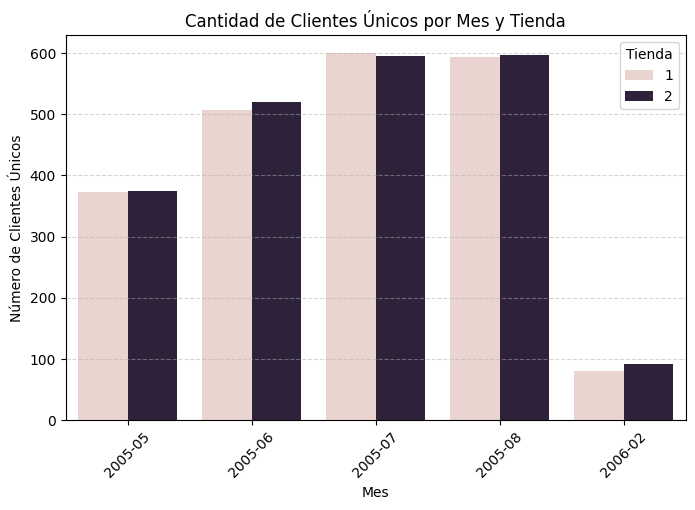

In [ ]:


def grafico_clientes_por_mes_tienda(df, columna_fecha, columna_tienda, columna_cliente):
    
    # Convertir la columna de fecha a formato datetime si no lo está
    df[columna_fecha] = pd.to_datetime(df[columna_fecha])

    # Crear una nueva columna con el mes y año
    df["rental_month"] = df[columna_fecha].dt.to_period("M").astype(str)

    # Contar clientes únicos por mes y tienda
    clientes_por_mes_tienda = df.groupby(["rental_month", columna_tienda])[columna_cliente].nunique().reset_index()

    # Crear el gráfico de barras con Seaborn
    plt.figure(figsize=(8, 5))
    sns.barplot(data=clientes_por_mes_tienda, x="rental_month", y=columna_cliente, hue=columna_tienda)

    plt.xlabel("Mes")
    plt.ylabel("Número de Clientes Únicos")
    plt.title("Cantidad de Clientes Únicos por Mes y Tienda")
    plt.xticks(rotation=45)  # Rotar los meses para mejor visibilidad
    plt.legend(title="Tienda")
    plt.grid(axis="y", linestyle="--", alpha=0.5)

    plt.show()

# Llamar a la función 
grafico_clientes_por_mes_tienda(df_film_rental, "rental_date", "staff_id", "customer_id")

C:\Users\User\AppData\Local\Temp\ipykernel_2852\876389955.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[columna_fecha] = pd.to_datetime(df[columna_fecha])
C:\Users\User\AppData\Local\Temp\ipykernel_2852\876389955.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["rental_month"] = df[columna_fecha].dt.to_period("M").astype(str)


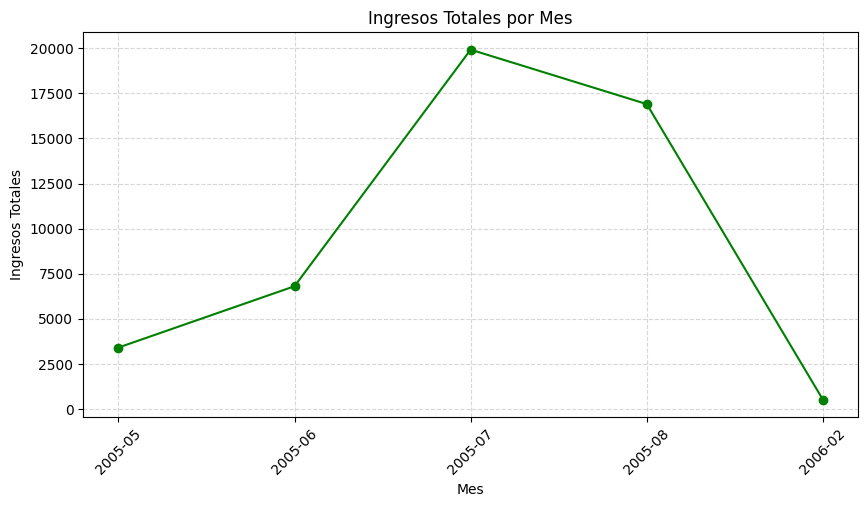

In [ ]:
def grafico_ingresos_por_mes(df, columna_fecha, columna_ingreso):
   
    # Convertir la columna de fecha a formato datetime si no lo está
    df[columna_fecha] = pd.to_datetime(df[columna_fecha])

    # Crear una nueva columna con el mes y año en formato 'YYYY-MM'
    df["rental_month"] = df[columna_fecha].dt.to_period("M").astype(str)

    # Calcular los ingresos por mes
    ingresos_por_mes = df.groupby("rental_month")[columna_ingreso].sum().reset_index()

    # Crear el gráfico de líneas
    plt.figure(figsize=(10, 5))
    plt.plot(ingresos_por_mes["rental_month"], ingresos_por_mes[columna_ingreso], marker='o', linestyle='-', color="green")

    # Configurar etiquetas y título
    plt.xlabel("Mes")
    plt.ylabel("Ingresos Totales")
    plt.title("Ingresos Totales por Mes")
    plt.xticks(rotation=45)  # Rotar los meses para mejor visibilidad
    plt.grid(True, linestyle="--", alpha=0.5)

    # Mostrar gráfico
    plt.show()

# Llamar a la función 
grafico_ingresos_por_mes(df_film_rental, "rental_date", "rental_rate")

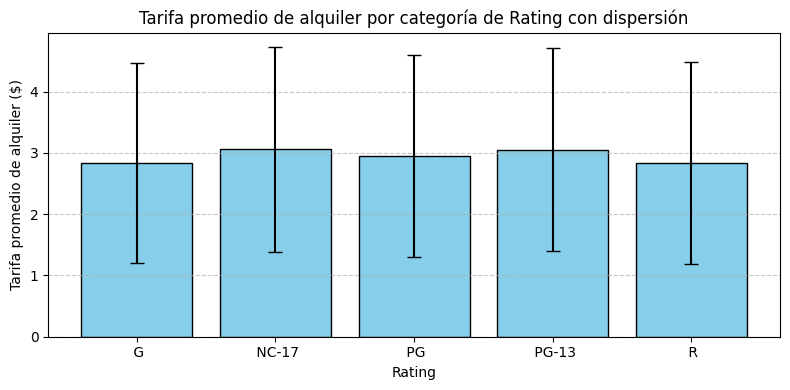

In [106]:
# Suponiendo que df_film_rental ya está definido con la estructura que mostraste
df1 = df_film_rental.copy()

# Calcular la media y la desviación estándar de la tarifa de alquiler por rating
rental_stats = df1.groupby('rating')['rental_rate'].agg(['mean', 'std']).reset_index()

# Configurar el gráfico de barras con barras de error (std como dispersión)
plt.figure(figsize=(8, 4))
plt.bar(rental_stats['rating'], rental_stats['mean'], yerr=rental_stats['std'], 
        capsize=5, color='skyblue', edgecolor='black')

# Etiquetas y título
plt.xlabel('Rating')
plt.ylabel('Tarifa promedio de alquiler ($)')
plt.title('Tarifa promedio de alquiler por categoría de Rating con dispersión')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar gráfico
plt.tight_layout()
plt.show()

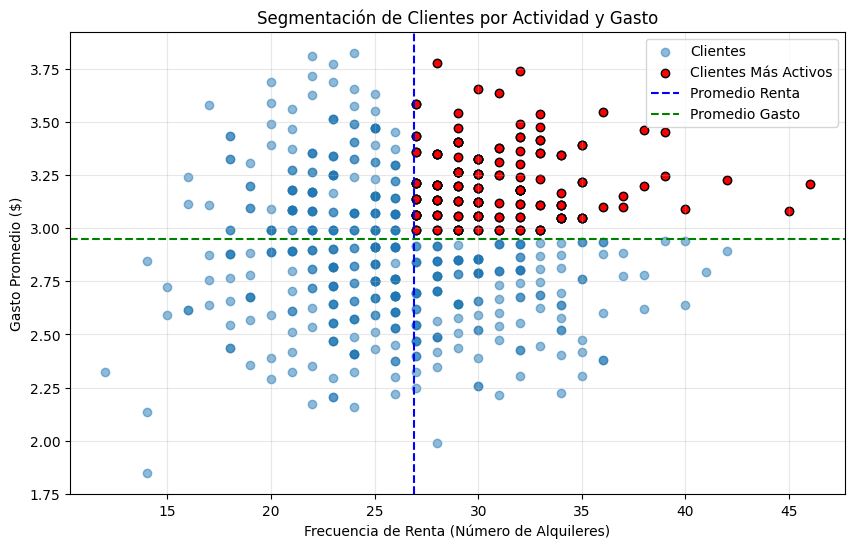

,customer_id,rental_count,avg_spent
147,148,46,3.207391
525,526,45,3.078889
143,144,42,3.228095
256,257,40,3.090000
177,178,39,3.451538
136,137,39,3.246410
458,459,38,3.463684
409,410,38,3.200526
175,176,37,3.152162
472,473,37,3.098108


In [109]:
# Calcular la frecuencia de renta (número de alquileres por cliente)
customer_rental_counts = df1.groupby('customer_id')['rental_id'].count().reset_index()
customer_rental_counts.columns = ['customer_id', 'rental_count']

# Calcular el gasto promedio por cliente
customer_spending = df1.groupby('customer_id')['rental_rate'].mean().reset_index()
customer_spending.columns = ['customer_id', 'avg_spent']

# Unir ambas métricas en un solo DataFrame
customer_analysis = pd.merge(customer_rental_counts, customer_spending, on='customer_id')

# Identificar el segmento de clientes más activos:
# - Clientes con más alquileres que el promedio.
# - Clientes con un gasto mayor que el promedio.
avg_rental_count = customer_analysis['rental_count'].mean()
avg_spent = customer_analysis['avg_spent'].mean()

active_customers = customer_analysis[
    (customer_analysis['rental_count'] > avg_rental_count) & 
    (customer_analysis['avg_spent'] > avg_spent)
]

# Gráfico de dispersión para visualizar segmentos de clientes
plt.figure(figsize=(10, 6))
plt.scatter(customer_analysis['rental_count'], customer_analysis['avg_spent'], alpha=0.5, label='Clientes')
plt.scatter(active_customers['rental_count'], active_customers['avg_spent'], 
            color='red', label='Clientes Más Activos', edgecolors='black')

# Líneas de referencia (promedios)
plt.axvline(avg_rental_count, color='blue', linestyle='--', label='Promedio Renta')
plt.axhline(avg_spent, color='green', linestyle='--', label='Promedio Gasto')

# Etiquetas y título
plt.xlabel('Frecuencia de Renta (Número de Alquileres)')
plt.ylabel('Gasto Promedio ($)')
plt.title('Segmentación de Clientes por Actividad y Gasto')
plt.legend()
plt.grid(alpha=0.3)

# Mostrar gráfico
plt.show()

# Mostrar los clientes más activos (Top 10)
active_customers.sort_values(by=['rental_count', 'avg_spent'], ascending=False).head(10)

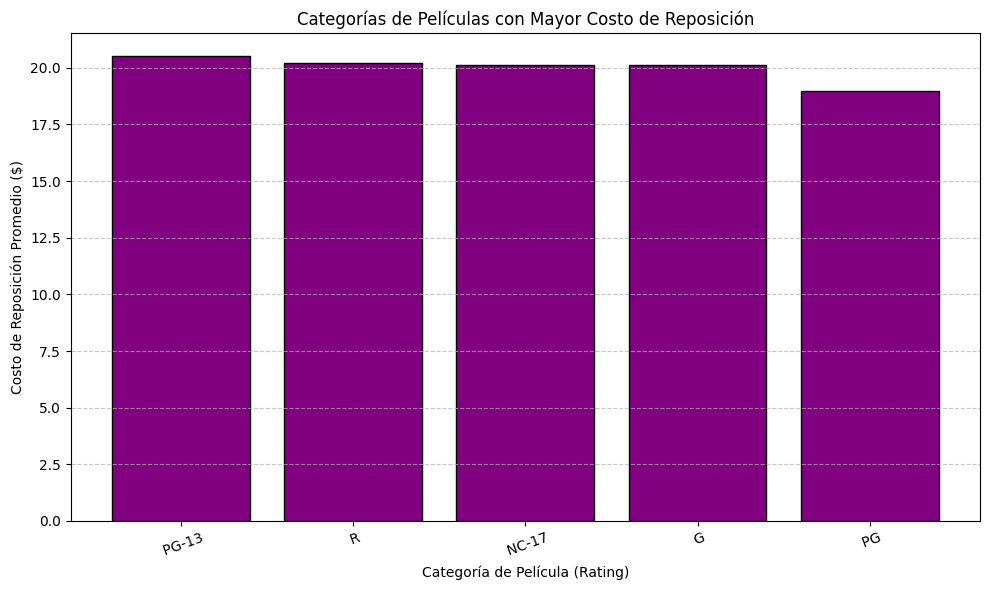

   rating  replacement_cost
3   PG-13         20.516549
4       R         20.231026
1   NC-17         20.137619
0       G         20.124831
2      PG         18.959119


In [ ]:

df2 = df_["film"].copy()

# Limpiar nombres de columnas
df2.columns = df2.columns.str.strip()

# Calcular el costo de reposición promedio por categoría de película (rating)
avg_replacement_cost = df2.groupby('rating')['replacement_cost'].mean().reset_index()

# Ordenar de mayor a menor
top_categories = avg_replacement_cost.sort_values(by='replacement_cost', ascending=False)

# Graficar las categorías con mayor costo de reposición promedio
plt.figure(figsize=(10, 6))
plt.bar(top_categories['rating'], top_categories['replacement_cost'], color='purple', edgecolor='black')
plt.xlabel('Categoría de Película (Rating)')
plt.ylabel('Costo de Reposición Promedio ($)')
plt.title('Categorías de Películas con Mayor Costo de Reposición')
plt.xticks(rotation=20)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar gráfico
plt.tight_layout()
plt.show()

# Mostrar las categorías con mayor costo de reposición
print(top_categories)